# Hierarchical clustering algorithm

## Exploratory Data Analysis

Note: this notebook may crash when running on a local machine due to OOM memory at the KMeans algorithm. Therefore, it is recommended to run this code on Google Colab.

In [83]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
# Load data into a Pandas dataframe 
df = pd.read_csv("marketing-campaign.csv")

In [85]:
# Show the first several data samples
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


This is a customer segmentation dataset with the following features:

- Year_Birth : Age of the customer.
- Education : Customer's level of education.
- Marital_Status : Customer's marital status.
- Income : Customer's yearly household income.
- Kidhome : Number of small children in customer's household.
- Teenhome : Number of teenagers in customer's household.
- Recency : Number of days since the last purchase.
- MntWines : The amount spent on wine products in the last 2 years.
- MntFruits : The amount spent on fruits products in the last 2 years.
- MntMeatProducts : The amount spent on meat products in the last 2 years.
- MntFishProducts : The amount spent on fish products in the last 2 years.
- MntSweetProducts : Amount spent on sweet products in the last 2 years.
- MntGoldProds : The amount spent on gold products in the last 2 years.
- NumDealsPurchases : Number of purchases made with discount.
- NumWebPurchases : Number of purchases made through the company's website.
- NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail).
- NumStorePurchases : Number of purchases made directly in stores.
- NumWebVisitsMonth : Number of visits to company's website in the last month.

In [86]:
# Descibe the dataset
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [87]:
# Get the list of categorical features (i.e., having string column names) 
cat_cols = [col for col in df.columns if df[col].dtypes=="O"]
cat_cols

['Education', 'Marital_Status']

# Data Preprocessing

In [88]:
# Make a copy of the data
data = df.copy() 

In [89]:
# Import library to encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Encode categorical features
for col in cat_cols:
    data.loc[:, col] = encoder.fit_transform(data[col])

In [90]:
# Show data after being encoded
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,2,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,2,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,2,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,2,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,4,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


In [91]:
# Import StandardScaler to standardize the data features.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit (calculate mean and standard deviation) and transform (substract mean and divide by std) the data
scaled_data = scaler.fit_transform(data.values)

# Hierarchical clustering using Scipy

In [92]:
# Import hierarchical clustering algorithm from scipy
from scipy.cluster import hierarchy

# Run the algorithm without specifying the number of clusters
clusters = hierarchy.linkage(scaled_data, method="ward") # 'ward' method: combine clusters to minimize within-cluster-variation.

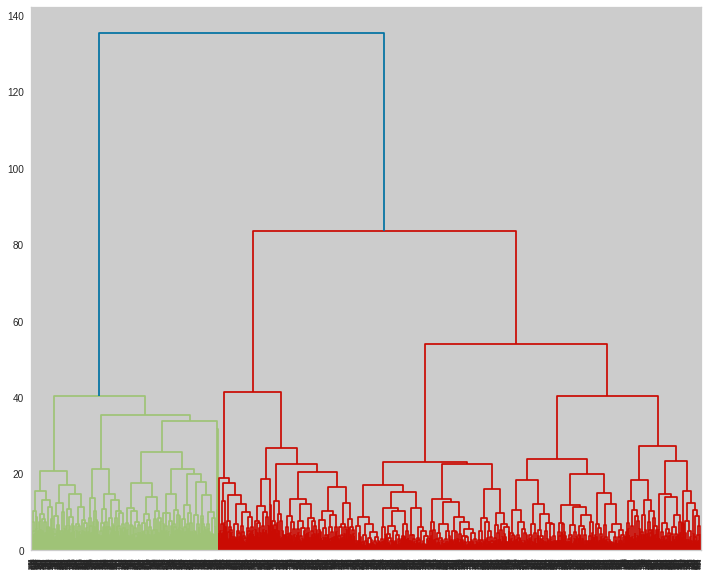

In [93]:
# Plot the hierarchical clusters
plt.figure(figsize=(12, 10))
dendrogram = hierarchy.dendrogram(clusters)

# Hierarchical clustering using Scikit-learn

In [94]:
# Import AgglomerativeClustering from scikit-learn
from sklearn.cluster import AgglomerativeClustering

# Run the hierarchical clustering algorithm with
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(scaled_data) # Perform the cut at 3 clusters
clustering.labels_

array([1, 0, 1, ..., 2, 2, 0])

# Cluster visualization with T-SNE

In [95]:
# Import TSNE library
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123) # Initialize TSNE with the TSNE space dimension (n_components)
tsne_features = tsne.fit_transform(scaled_data) # Project data (high dimension) to TSNE space (low dimension)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2216 samples in 0.000s...
[t-SNE] Computed neighbors for 2216 samples in 0.137s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2216
[t-SNE] Computed conditional probabilities for sample 2000 / 2216
[t-SNE] Computed conditional probabilities for sample 2216 / 2216
[t-SNE] Mean sigma: 1.108857
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.528183
[t-SNE] KL divergence after 1000 iterations: 1.340223


[Text(0.5, 1.0, 'Cluster visualization on a 2-dimensional space')]

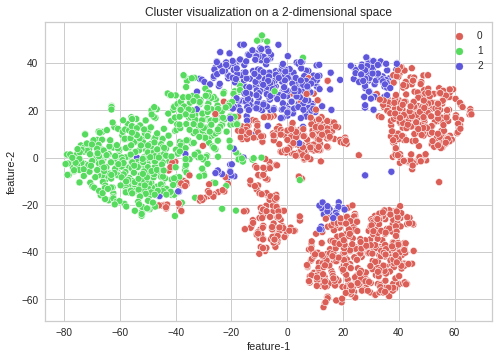

In [96]:
# Import seaborn library for cluster visualization
import seaborn as sns

# Create a data frame with TSNE features and data label
df = pd.DataFrame()
df["label"] = clustering.labels_
df["feature-1"] = tsne_features[:,0]
df["feature-2"] = tsne_features[:,1]

# Visualize the clusters
sns.scatterplot(x="feature-1", y="feature-2", # Set the two TSNE features to the axes
                hue=df.label.tolist(), # Set the label
                palette=sns.color_palette("hls", 3), # Set cluster colors 
                data=df).set(title="Cluster visualization on a 2-dimensional space") # Set dataframe to visulize and plot title